## 선형회귀(Linear Regression) - 심화

#### Linear Regression을 활용하여 섭씨온도(C, Celsius)를 화씨온도(F, Fahrenheit)로 변환해주는 공식을 만들수 있다. 
섭씨온도과 화씨온도의 관계는 앞에서 우리가 살펴보았던 선형회귀의 관계를 가지고 있다.
#### <span style="color:red"> H(x) = aX + b 에서처럼, F = C*1.8 +32  </span>
이때, 1.8과 32라는 값을 모르고 있다고 가정하고, 머신러닝 알고리즘을 이용해서 주어진 섭씨 온도와 화씨온도 데이타 만으로 이 값들을 찾아내는 실습을 진행해보도록 하겠다.
<u><span style="color:red">[Chain Rule 증명](https://www.khanacademy.org/math/ap-calculus-ab/ab-differentiation-2-new/ab-3-1b/a/proving-the-chain-rule) </span></u>

### Configuration (or prerequisite)

In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

### Generate Dataset

####  <span style="color:blue">선형회귀 문제를 다루기 위한 학습용 데이타셋을 생성</span>
0도에서 100도 사이의 값을 갖는 섭씨온도 데이타를 100개 만들어보자
이 데이타가 해당 머신러닝 알고리즘에서 사실상 Feature가 될 것이다.

In [2]:
np.random.seed(0)
C = np.random.randint(0, 100)
C

C = np.random.randint(0, 100, size=100)
C

C = np.random.randint(low=0, high=100, size=100)
C 

array([69, 41, 35, 64, 95, 69, 94,  0, 50, 36, 34, 48, 93,  3, 98, 42, 77,
       21, 73,  0, 10, 43, 58, 23, 59,  2, 98, 62, 35, 94, 67, 82, 46, 99,
       20, 81, 50, 27, 14, 41, 58, 65, 36, 10, 86, 43, 11,  2, 51, 80, 32,
       54,  0, 38, 19, 46, 42, 56, 60, 77, 30, 24,  2,  3, 94, 98, 13, 40,
       72, 19, 95, 72, 26, 66, 52, 67, 61, 14, 96,  4, 67, 11, 86, 77, 75,
       56, 16, 24, 29, 21, 25, 80, 60, 61, 83, 33, 32, 70, 85, 31])

In [3]:
'''
섭씨온도 데이터를 담고있는 C의 shape를 확인합니다. (100,)로 100개의 데이터가 있습니다.
C의 첫 10개 값을 확인합니다. 
'''
print(C.shape)
C[:10]

(100,)


array([69, 41, 35, 64, 95, 69, 94,  0, 50, 36])

### 섭씨온도 데이타에 상응하는 화씨온도를 생성
#### <span style="color:blue">우리가 알고있던 기존의 섭씨-화씨변환 공식을 적용해서 위 섭씨온도 데이타에 대응하는 화씨온도 데이타를 생성.</span> 
이 데이타가 오늘 다룰 학습 모델 알고리즘의 Label이 될 것이다.<br>
weight, bias값을 찾아내는 것이 학습의 목표이다.

### Bias (편향 찾기) -- Weight는 1.8

####  <span style="color:blue">Weight는 1.8로 주고 Bias를 직관적으로 한번 찾아보겠다.</span>

In [5]:
F = 1.8 * C + 32
F[:10]


array([156.2, 105.8,  95. , 147.2, 203. , 156.2, 201.2,  32. , 122. ,
        96.8])

### Visualization

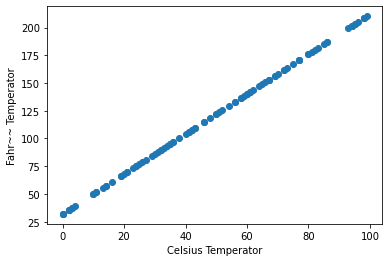

In [6]:
plt.scatter(C, F)
plt.xlabel('Celsius Temperator')
plt.ylabel('Fahr~~ Temperator')
plt.show()

### Gradient Descent

### 가중치(Weight, W), 편향(Bias, B) 찾기
####  <span style="color:red">이제 경사하강법(Gradient Descent)을 사용하여 섭씨온도를 화씨온도로 변환해줄 주 있는 공식을 찾아보겠다.</span>
공식의 세부내용은 모른다치고, 두 변수(X,y)가 선형(Linear)과 관계있음을 가정(y=X * w + b)하여 가중치(weight)와 편차(bias)를 정의해 둔다. 그리고 경사하강법을 이용해서 선형회귀를 학습시킨다.
학습이 완료되면, 얻어진 최적의 가중치와 편차로 섭씨온도를 화씨온도로 변환해주는 공식을 만들어 줄수 있다.
학습은 모든 epoch이 끝날 때까지 반복할 수도 있지만, 여기선 오차(error)가 0.1 이하가 되면 학습을 종료하도록 한다.

In [7]:
X = C
Y = F

In [12]:
w = 1.8

#b는 아무값이나 지정해 보겠다.
b = np.random.uniform(low=-1.0, high = 1.0)

w,b

(1.8, -0.7290518715550995)

### Predict

In [13]:
y_predict = w * X +b
y_predict[:10]

array([123.47094813,  73.07094813,  62.27094813, 114.47094813,
       170.27094813, 123.47094813, 168.47094813,  -0.72905187,
        89.27094813,  64.07094813])

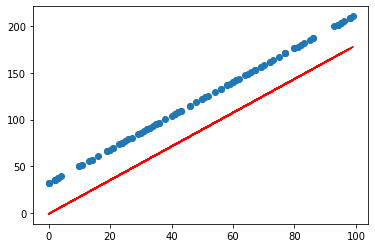

In [14]:
plt.scatter(C,F)
plt.plot(C,y_predict, c = 'r')
plt.show()

In [23]:
b = b-(y_predict-Y).mean()
b

32.00000000000001

In [24]:
y_predict = w * C+b
y_predict[:10]

array([156.2, 105.8,  95. , 147.2, 203. , 156.2, 201.2,  32. , 122. ,
        96.8])

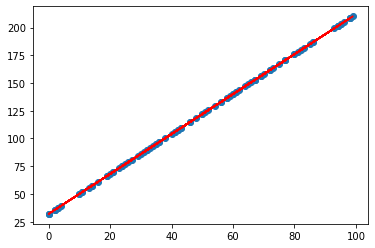

In [25]:
plt.scatter(C,F)
plt.plot(C, y_predict,c = 'r' )
plt.show()

    이번에는 w, b 값 둘다 랜덤하게 지정한 다음에 가장 확실한 선형을 그을수 있는
    w, b값을 찾아보도록 하겠다

In [30]:
w = np.random.uniform(-1.0, 1.0)
b = np.random.uniform(-1.0, 1.0)
w,b

(-0.26487625990420693, -0.12827014946874638)

In [31]:
y_predict = w * X + b
y_predict[:10]

array([-18.40473208, -10.98819681,  -9.39893925, -17.08035078,
       -25.29151484, -18.40473208, -25.02663858,  -0.12827015,
       -13.37208314,  -9.66381551])

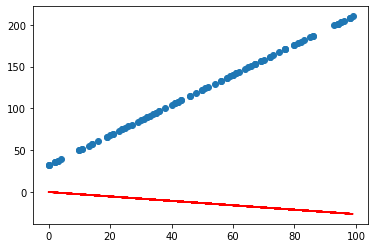

In [32]:
plt.scatter(C,F)
plt.plot(C, y_predict, c = 'r')

### Gradient Decsent
#### 가중치(weight), 편향(bias) 찾기

In [33]:
#학습을 몇회 반복할지를 지정, 즉 몇번의 for문을 돌릴지를 지정한다.
'''
1회 학습할때 w,b값이 나오고 cost값이 도출...얼마만큼 기울기를 수정해야 할지가 정해진다.,
계속 학습을 반복해나가다가 cost값이 0에 가까워지면 학습을 멈추도록 로직을 작성
'''
num_epoch = 100000
learning_rate = 0.0003


w = np.random.uniform(-1.0, 1.0)
b = np.random.uniform(-1.0, 1.0)

for epoch in range(num_epoch):
    y_predict = w * X + b
    
    #얼마나 예측을 잘 했는지에 대한 정량화된 값을 구한다...MSE(pred-Y)**2
    loss = np.abs(y_predict - Y).mean()
    
    if(loss<0.1): #거의 0에 가까워 졌다면
        break
        
    #계속적으로 학습을 진행하는데...w, b값을 업데이트 해준다는 의미
    w = w-learning_rate *((y_predict - Y) * X).mean()
    b = b-learning_rate *(y_predict - Y).mean()
    
    if epoch % 10000 ==0:
        print(f"{epoch:5} w={w: .3f}, b={b:.3f}, loss={loss:.3f}")

print('--------------------------------------------------')
print(f"{epoch:5} w={w: .3f}, b={b:.3f}, loss={loss:.3f}")

    0 w= 2.229, b=0.637, loss=81.067
10000 w= 2.017, b=17.632, loss=6.062
20000 w= 1.900, b=25.418, loss=2.777
30000 w= 1.846, b=28.984, loss=1.272
40000 w= 1.821, b=30.619, loss=0.583
50000 w= 1.810, b=31.367, loss=0.267
60000 w= 1.804, b=31.710, loss=0.122
--------------------------------------------------
62583 w= 1.804, b=31.763, loss=0.100


In [34]:
y_predict = w * C + b
y_predict[:5]

array([156.21045537, 105.71003052,  94.88851091, 147.19252236,
       203.10370702])

### Visualization

In [35]:
result = pd.DataFrame({"C":C, "F":F, "F(Predict)":y_predict})
result.head(10)

,C,F,F(Predict)
0,69,156.2,156.210455
1,41,105.8,105.710031
2,35,95.0,94.888511
3,64,147.2,147.192522
4,95,203.0,203.103707
5,69,156.2,156.210455
6,94,201.2,201.300120
7,0,32.0,31.762980
8,50,122.0,121.942310
9,36,96.8,96.692098


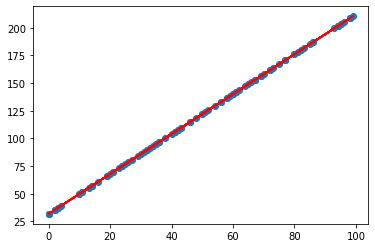

In [36]:
plt.scatter(C,F)
plt.plot(C,y_predict, c = 'r')